In [74]:
import numpy as np
import pandas as pd
import copy

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [24]:
# Data download

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/' \
      + 'breast-cancer-wisconsin/breast-cancer-wisconsin.data'
    
data = pd.read_csv(url,header=0,
                   names = ['SAMPLE_ID',
                            'CLUMP_THICKNESS',
                            'UNIFORMITY_SIZE',
                            'UNIFORMITY_SHAPE',
                            'MARGINAL_ADHESION',
                            'EPITHELIAL_SIZE',
                            'BARE_NUCLEI',
                            'BLAND_CHROMATIN',
                            'NORMAL_NUCLEOLI',
                            'MITOSES',
                            'CLASS'],
                  index_col=0)

data.head()

# 1. Sample code number: id number 
# 2. Clump Thickness: 1 - 10 
# 3. Uniformity of Cell Size: 1 - 10 
# 4. Uniformity of Cell Shape: 1 - 10 
# 5. Marginal Adhesion: 1 - 10 
# 6. Single Epithelial Cell Size: 1 - 10 
# 7. Bare Nuclei: 1 - 10 
# 8. Bland Chromatin: 1 - 10 
# 9. Normal Nucleoli: 1 - 10 
# 10. Mitoses: 1 - 10 
# 11. Class: (2 for benign, 4 for malignant)

,CLUMP_THICKNESS,UNIFORMITY_SIZE,UNIFORMITY_SHAPE,MARGINAL_ADHESION,EPITHELIAL_SIZE,BARE_NUCLEI,BLAND_CHROMATIN,NORMAL_NUCLEOLI,MITOSES,CLASS
SAMPLE_ID,,,,,,,,,,
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


In [82]:
# Data cleaning

print(data.shape)
# print(data.CLUMP_THICKNESS.value_counts())
# print(data.groupby(by='CLUMP_THICKNESS').count())
print(data.apply(pd.value_counts))

# print(data.describe)

print(data.dtypes)


(698, 10)
    CLUMP_THICKNESS  UNIFORMITY_SIZE  UNIFORMITY_SHAPE  MARGINAL_ADHESION  \
1             145.0            383.0             352.0              406.0   
2              50.0             45.0              59.0               58.0   
3             108.0             52.0              56.0               58.0   
4              80.0             40.0              44.0               33.0   
5             129.0             30.0              34.0               23.0   
6              34.0             27.0              30.0               22.0   
7              23.0             19.0              30.0               13.0   
8              46.0             29.0              28.0               25.0   
9              14.0              6.0               7.0                5.0   
10             69.0             67.0              58.0               55.0   
1               NaN              NaN               NaN                NaN   
10              NaN              NaN               NaN            

/Users/neilpeterman/anaconda/envs/my_projects_env/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
/Users/neilpeterman/anaconda/envs/my_projects_env/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [85]:
data2 = copy.deepcopy(data)
x = data.BARE_NUCLEI.values
# dex = 0
z = []
for y in x:
    try:
        y = int(y)
    except ValueError:
        y = -1
    z.append(y)
#     dex += 1
#     if dex>10:
#         break

# z = np.array(z)

data2 = data.drop('BARE_NUCLEI', axis=1)
data2['BARE_NUCLEI'] = z

print(data2.apply(pd.value_counts))

# data2.dtypes

# data2.replace(to_replace = 'BARE_NUCLEI',value = z)
# type(data)
# data2.BARE_NUCLEI = z
# type(int(data.BARE_NUCLEI.values[0])) #.astype(str).astype(int)

     CLUMP_THICKNESS  UNIFORMITY_SIZE  UNIFORMITY_SHAPE  MARGINAL_ADHESION  \
-1               NaN              NaN               NaN                NaN   
 1             145.0            383.0             352.0              406.0   
 2              50.0             45.0              59.0               58.0   
 3             108.0             52.0              56.0               58.0   
 4              80.0             40.0              44.0               33.0   
 5             129.0             30.0              34.0               23.0   
 6              34.0             27.0              30.0               22.0   
 7              23.0             19.0              30.0               13.0   
 8              46.0             29.0              28.0               25.0   
 9              14.0              6.0               7.0                5.0   
 10             69.0             67.0              58.0               55.0   

     EPITHELIAL_SIZE  BLAND_CHROMATIN  NORMAL_NUCLEOLI  MITOSES

(array([  16.,    0.,  401.,   30.,   28.,   19.,   30.,    4.,    8.,
          21.,    9.,  132.]),
 array([ -1.        ,  -0.08333333,   0.83333333,   1.75      ,
          2.66666667,   3.58333333,   4.5       ,   5.41666667,
          6.33333333,   7.25      ,   8.16666667,   9.08333333,  10.        ]),
 <a list of 12 Patch objects>)

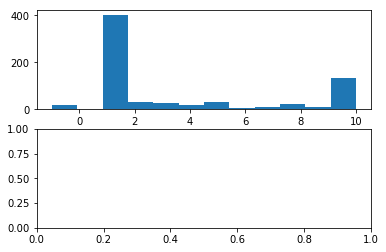

In [93]:
fig, (ax1,ax2) = plt.subplots(2,1)

ax1.hist(data2.BARE_NUCLEI.values,bins=12)

